In [26]:
import pandas as pd

In [27]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

In [28]:
wastew_df = pd.read_csv('D:\TOOLS\Respiratory_Virus_Wastewater_Surveillance.csv')

In [29]:
print("Waste Water dataset shape:", wastew_df.shape)

Waste Water dataset shape: (6645, 14)


In [30]:
print(type(wastew_df))

<class 'pandas.core.frame.DataFrame'>


In [31]:
print(wastew_df.shape)


(6645, 14)


In [32]:
wastew_df.head

<bound method NDFrame.head of       mmwr_week  week  week_start    week_end     season     pathogen  siteno  \
0        202533    33  08/10/2025  08/16/2025  2024-2025  Influenza A       5   
1        202533    33  08/10/2025  08/16/2025  2024-2025  Influenza A       4   
2        202533    33  08/10/2025  08/16/2025  2024-2025   SARS-CoV-2      10   
3        202509     9  02/23/2025  03/01/2025  2024-2025        PMMOV       8   
4        202533    33  08/10/2025  08/16/2025  2024-2025          RSV       4   
...         ...   ...         ...         ...        ...          ...     ...   
6640     202343    43  10/22/2023  10/28/2023  2023-2024          RSV      10   
6641     202412    12  03/17/2024  03/23/2024  2023-2024  Influenza B       5   
6642     202515    15  04/06/2025  04/12/2025  2024-2025  Influenza A       9   
6643     202507     7  02/09/2025  02/15/2025  2024-2025  Influenza A       8   
6644     202523    23  06/01/2025  06/07/2025  2024-2025  Influenza A       9  

In [34]:
wastew_df = pd.read_csv('D:\TOOLS\Respiratory_Virus_Wastewater_Surveillance.csv')
wastew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mmwr_week                   6645 non-null   int64  
 1   week                        6645 non-null   int64  
 2   week_start                  6645 non-null   object 
 3   week_end                    6645 non-null   object 
 4   season                      6645 non-null   object 
 5   pathogen                    6645 non-null   object 
 6   siteno                      6645 non-null   int64  
 7   sitename                    6645 non-null   object 
 8   year                        6645 non-null   int64  
 9   target_wkavg_concentration  6129 non-null   float64
 10  conc_toplot                 6129 non-null   float64
 11  wkavg_val                   4800 non-null   float64
 12  wkavg_val_category          4800 non-null   object 
 13  row_id                      6645 

In [35]:
wastew_df.describe()

,mmwr_week,week,siteno,year,target_wkavg_concentration,conc_toplot,wkavg_val
count,6645.00000,6645.000000,6645.000000,6645.000000,6.129000e+03,6129.000000,4800.000000
mean,202396.17532,26.724605,151.936795,2023.694507,1.313124e+08,3.850708,6.028778
std,100.06758,14.307968,350.235593,1.019072,3.821612e+08,5.820251,19.819902
min,202207.00000,1.000000,4.000000,2022.000000,0.000000e+00,-1.000000,0.000000
25%,202324.00000,15.000000,5.000000,2023.000000,0.000000e+00,-1.000000,0.000000
50%,202413.00000,27.000000,8.000000,2024.000000,4.520610e-05,1.655197,1.786206
75%,202503.00000,39.000000,10.000000,2025.000000,1.903312e-03,3.279510,5.888005
max,202544.00000,52.000000,999.000000,2025.000000,6.233871e+09,15.794758,665.887844


In [36]:
# Show missing value percentages
missing_percent = (wastew_df.isnull().sum() / len(wastew_df)) * 100
print(missing_percent)

mmwr_week                      0.000000
week                           0.000000
week_start                     0.000000
week_end                       0.000000
season                         0.000000
pathogen                       0.000000
siteno                         0.000000
sitename                       0.000000
year                           0.000000
target_wkavg_concentration     7.765237
conc_toplot                    7.765237
wkavg_val                     27.765237
wkavg_val_category            27.765237
row_id                         0.000000
dtype: float64


In [37]:
wastew_df.isnull().sum()[wastew_df.isnull().sum() > 0]

target_wkavg_concentration     516
conc_toplot                    516
wkavg_val                     1845
wkavg_val_category            1845
dtype: int64

In [38]:
wastew_df = wastew_df.dropna(axis=1, how='all')

In [39]:
#Check how severe the missing data is
print("\n---- Missing Value Percentage ----")
print((wastew_df.isnull().sum() / len(wastew_df) * 100).round(2))


---- Missing Value Percentage ----
mmwr_week                      0.00
week                           0.00
week_start                     0.00
week_end                       0.00
season                         0.00
pathogen                       0.00
siteno                         0.00
sitename                       0.00
year                           0.00
target_wkavg_concentration     7.77
conc_toplot                    7.77
wkavg_val                     27.77
wkavg_val_category            27.77
row_id                         0.00
dtype: float64


In [40]:
print(wastew_df.dtypes)
print(wastew_df['pathogen'].unique())

mmwr_week                       int64
week                            int64
week_start                     object
week_end                       object
season                         object
pathogen                       object
siteno                          int64
sitename                       object
year                            int64
target_wkavg_concentration    float64
conc_toplot                   float64
wkavg_val                     float64
wkavg_val_category             object
row_id                         object
dtype: object
['Influenza A' 'SARS-CoV-2' 'PMMOV' 'RSV' 'Influenza B']


In [41]:
# Fix for text column
if 'pathogen' in wastew_df.columns:
    wastew_df['pathogen'] = wastew_df['pathogen'].fillna(wastew_df['pathogen'].mode()[0])
    print("Filled missing values in 'disease' with the most frequent category.")

Filled missing values in 'disease' with the most frequent category.


In [43]:
# ~~Example: Convert numeric columns stored as strings~~
numeric_columns = ['pathogen']  # adjust as per your dataset
for col in numeric_columns:
    if col in wastew_df.columns:
        wastew_df[col] = pd.to_numeric(wastew_df[col], errors='coerce')
        print(f"Converted '{col}' to numeric type.")

Converted 'pathogen' to numeric type.


In [44]:
# --- Identify Duplicates ---
duplicate_count = wastew_df.duplicated().sum()
print(f"\n---- Duplicate Rows Found: {duplicate_count} ----")


---- Duplicate Rows Found: 0 ----


In [45]:
# --- Remove Duplicates ---
if duplicate_count > 0:
    wastew_df = wastew_df.drop_duplicates()
    print("Duplicate rows removed successfully.")

In [46]:
# --- Verify ---
print(f"Remaining rows after cleanup: {wastew_df.shape[0]}")
import seaborn as sns

Remaining rows after cleanup: 6645


In [47]:
# --- Select numeric columns only ---
numeric_cols = wastew_df.select_dtypes(include=['float64', 'int64']).columns

In [48]:
print(wastew_df['pathogen'].describe())
print(wastew_df['pathogen'].unique())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pathogen, dtype: float64
[nan]


In [49]:
wastew_df['pathogen'] = pd.to_numeric(wastew_df['pathogen'], errors='coerce')
print(wastew_df['pathogen'].isna().sum())

6645


In [50]:
wastew_df['pathogen'] = wastew_df['pathogen'].astype('category').cat.codes

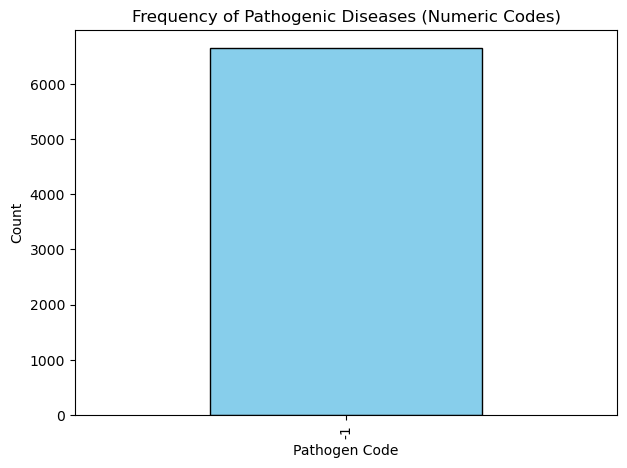

In [51]:
#plt.figure(figsize=(7,5))
#wastew_df['pathogen'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
#plt.title('Frequency of Pathogenic Diseases (Numeric Codes)')
#plt.xlabel('Pathogen Code')
#plt.ylabel('Count')
#plt.show()#